In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, 

## Load data

In [2]:
data = pd.read_csv('sample.csv')

In [3]:
data_train = pd.read_csv('train.csv')

In [4]:
data_test = pd.read_csv('test.csv')

## Data detalization

In [5]:
data.head()

,id,radius
0,4365,0.14
1,1129,0.91
2,2602,0.79
3,1747,0.93
4,3286,0.76


In [6]:
data_train.head()

,id,amd,intel,radius
0,5571,259,284,0.25
1,4339,205,169,0.26
2,4397,208,430,0.10
3,4088,195,504,0.16
4,1612,99,417,0.17


In [7]:
data_train.columns

Index(['id', 'amd', 'intel', 'radius'], dtype='object')

In [8]:
data_train.amd.describe()

count    5422.000000
mean      154.537993
std        69.836996
min        18.000000
25%        96.000000
50%       152.000000
75%       214.000000
max       288.000000
Name: amd, dtype: float64

In [9]:
data_train.drop('id', axis = 1, inplace = True)

In [10]:
data_train.intel.describe()

count    5422.000000
mean      306.340280
std       167.863611
min        15.000000
25%       154.000000
50%       315.000000
75%       458.000000
max       591.000000
Name: intel, dtype: float64

In [11]:
data_train.radius.describe()

count    5422.000000
mean        0.350906
std         0.220059
min         0.100000
25%         0.190000
50%         0.290000
75%         0.390000
max         0.900000
Name: radius, dtype: float64

In [12]:
data_test.head()

,id,amd,intel
0,4365,206,405
1,1129,80,320
2,2602,136,228
3,1747,105,531
4,3286,161,475


In [13]:
# data_test.drop('id', axis = 1, inplace = True)

In [14]:
data_test.amd.describe()

count    603.000000
mean     147.895522
std       70.007575
min       23.000000
25%       90.000000
50%      142.000000
75%      206.500000
max      285.000000
Name: amd, dtype: float64

In [15]:
data_test.intel.describe()

count    603.000000
mean     315.950249
std      168.007725
min       16.000000
25%      164.000000
50%      326.000000
75%      467.500000
max      591.000000
Name: intel, dtype: float64

In [16]:
ProfileReport(data_train)

Number of variables,3
Number of observations,5422
Total Missing (%),0.0%
Total size in memory,127.2 KiB
Average record size in memory,24.0 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


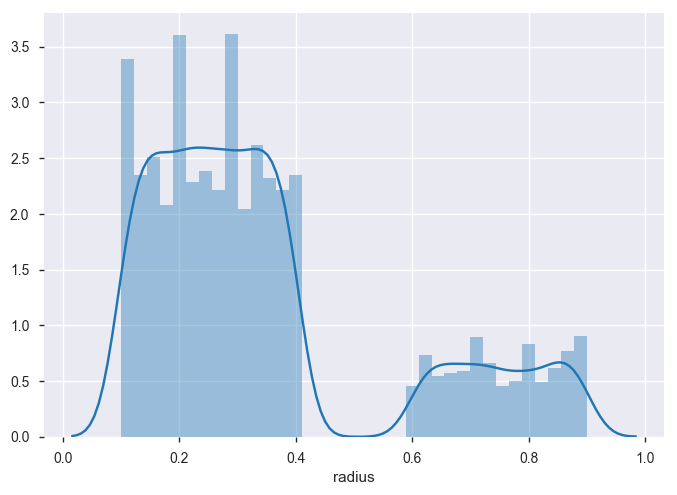

In [17]:
sns.distplot(data_train['radius'])

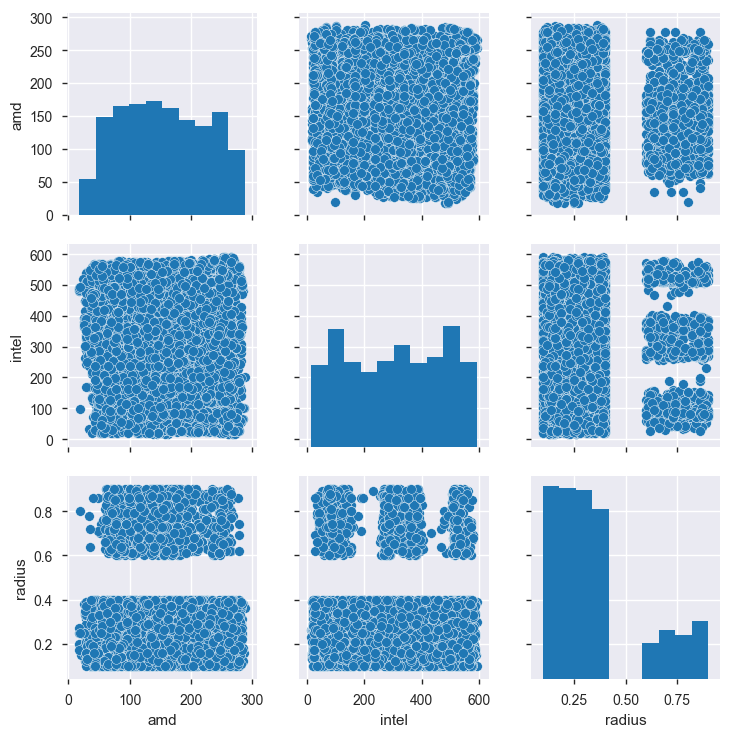

In [18]:
sns.pairplot(data_train)

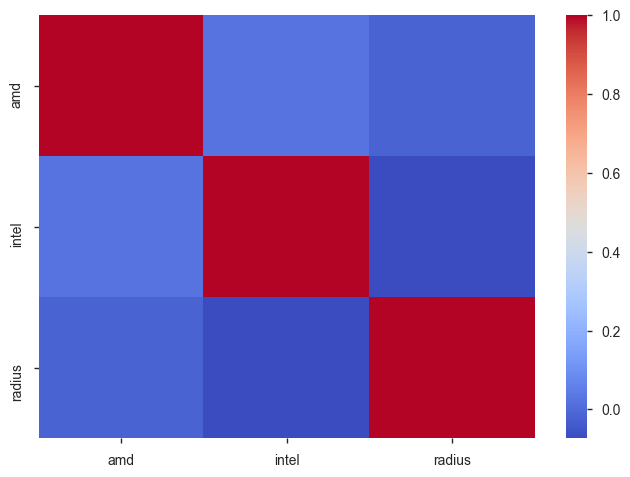

In [19]:
sns.heatmap(data_train.corr(), cmap='coolwarm')

## Train model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet, SGDRegressor
from sklearn import cross_validation
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import scale
import numpy as np

In [22]:
X = data_train[['amd', 'intel']]
Y = data_train['radius']

In [23]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.15, random_state=101)

In [25]:
### GridSearchCV parameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False, True],
    'max_depth': [5, 7, 9, 11, 15, 30],
#     'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500],
    'random_state': [23, 41, 55, 79]
}

# Create a based model
model = RandomForestRegressor()
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1).fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500,
 'random_state': 41}

In [29]:
# xgdmat=xgb.DMatrix(X_train,y_train)
# our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
# model=xgb.train(our_params,xgdmat)
# tesdmat=xgb.DMatrix(X_test)
# y_pred=model.predict(tesdmat)
# print(y_pred)

[0.41329813 0.40923893 0.37050262 ... 0.38819432 0.41681844 0.4365949 ]


In [87]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
'max_depth': [2, 4, 5, 6],
'min_samples_leaf': [3, 5, 9, 17],
'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
}

est = GradientBoostingRegressor(n_estimators=3000)
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, n_jobs=4).fit(X_train, y_train)

# best hyperparameter setting
gs_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'max_features': 0.3,
 'min_samples_leaf': 17}

In [ ]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.268, random_state=101)
param_grid={
    'n_estimators':[100, 250, 350, 500, 750], 
            'learning_rate': [0.1, 0.05,0.02, 0.01], 
            'max_depth':[8, 9, 10, 11, 13, 15], 
            'min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.5, 0.3, 0.1],
            'subsample':[0.1, 0.3, 0.5, 0.7]
           }
model = GradientBoostingRegressor()
clf = GridSearchCV(model, param_grid, n_jobs=-1).fit(X_train, y_train)
print(clf.best_params_)

In [132]:
model = GradientBoostingRegressor(n_estimators=250, learning_rate = 0.01, max_depth= 11, max_features= 0.5, min_samples_leaf = 3, random_state=101)
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=11, max_features=0.5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [26]:
model = RandomForestRegressor(bootstrap = True, max_depth = 11, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 500, random_state = 41)
model.fit(X_train, y_train)
"""
'bootstrap': True,
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500,
 'random_state': 41
"""

"\n'bootstrap': True,\n 'max_depth': 11,\n 'min_samples_leaf': 3,\n 'min_samples_split': 8,\n 'n_estimators': 500,\n 'random_state': 41\n"

## Model Evaluation

In [27]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [28]:
# tesdmat=xgb.DMatrix(X_test)
# pred=model.predict(tesdmat)
# print(pred)

predictions = model.predict(X_test)

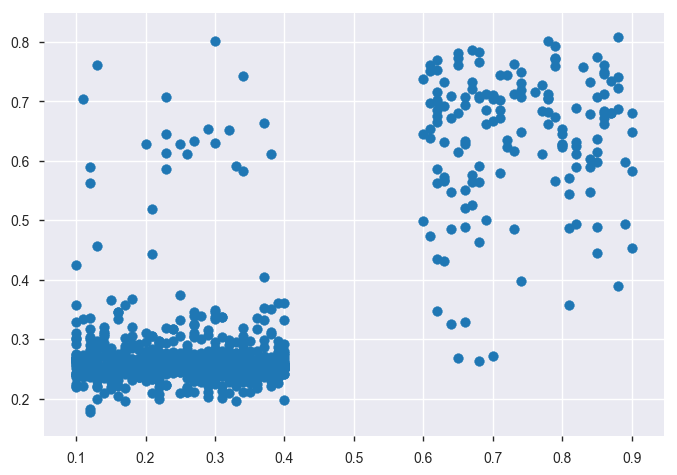

In [29]:
plt.scatter(y_test,predictions)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


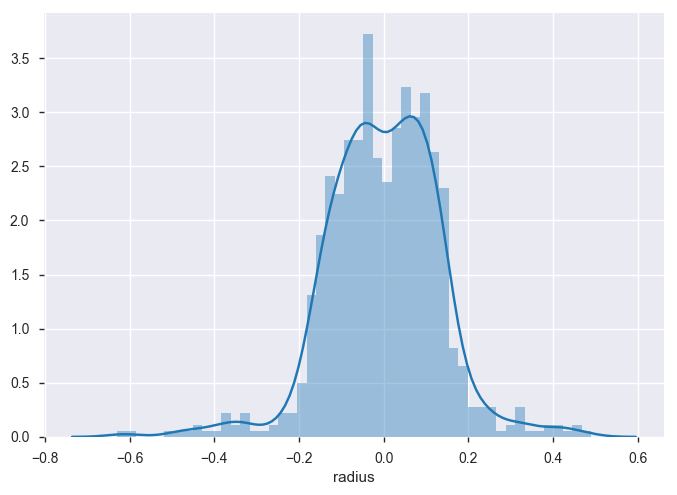

In [30]:
sns.distplot((y_test-predictions),bins=50);

In [31]:
X_test = data_test[['amd', 'intel']]
y_test = data['radius']

In [32]:
# tesdmat=xgb.DMatrix(X_test)
# pred=model.predict(tesdmat)
pred = model.predict(X_test)
print(pred)

[0.23142002 0.67119436 0.25326764 0.71051464 0.25745322 0.19992408
 0.27533377 0.27189454 0.27607726 0.2685026  0.27964238 0.25703478
 0.25366225 0.23817279 0.24222633 0.28086289 0.29648405 0.24310078
 0.63887795 0.33687955 0.22777613 0.23981443 0.2586058  0.26384129
 0.26457107 0.25874209 0.28207132 0.3007947  0.2688945  0.69192396
 0.6449991  0.53636915 0.40991684 0.29501738 0.55627424 0.26130833
 0.25659585 0.65593031 0.24938198 0.23626742 0.25566585 0.73852961
 0.67615026 0.25154451 0.67875318 0.72953266 0.25558778 0.26087166
 0.24373046 0.23892517 0.36582444 0.23440317 0.77986929 0.2010186
 0.26843586 0.24304526 0.25836775 0.64044128 0.24444095 0.26679574
 0.24400499 0.3128818  0.18456952 0.25322166 0.58289038 0.47181829
 0.24884364 0.55934531 0.27021686 0.22599767 0.27904526 0.24609959
 0.29332089 0.26963937 0.69962758 0.20091292 0.26629493 0.72548204
 0.53613975 0.24112681 0.32064779 0.25082261 0.23740182 0.71818434
 0.27908238 0.25152693 0.70353706 0.23430843 0.30762484 0.24762

In [33]:
# tesdmat=xgb.DMatrix(X_test)
# pred=model.predict(tesdmat)
# print(pred)

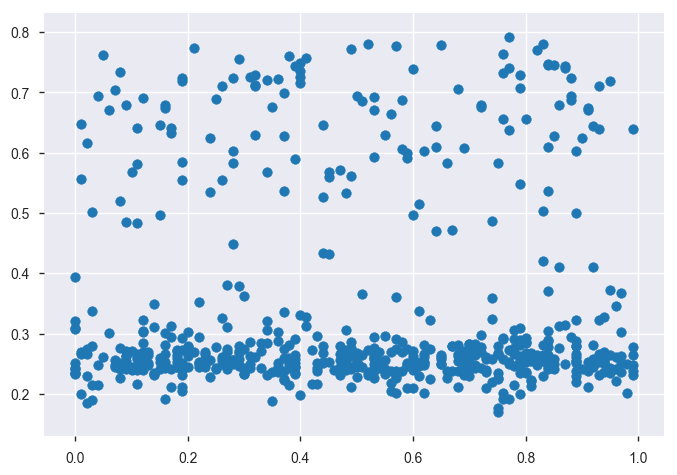

In [34]:
plt.scatter(y_test,pred)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


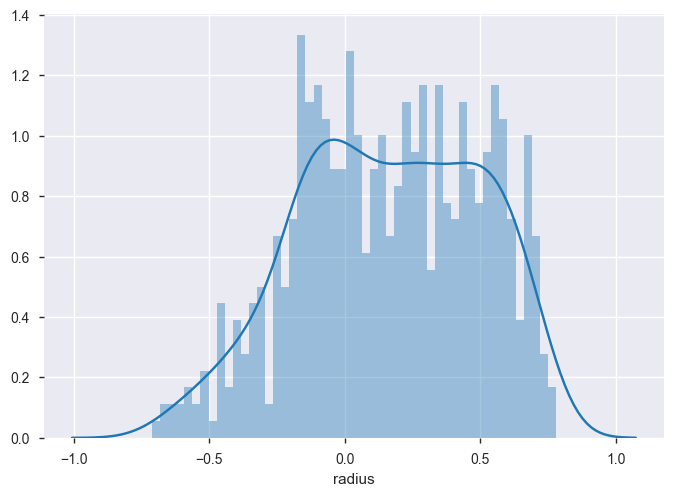

In [35]:
sns.distplot((y_test-pred),bins=50);

### Regression Evaluate Metrics

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.3065820370218277
MSE: 0.13717224768741618
RMSE: 0.3703677195537108


In [38]:
# pred = np.round(pred, decimals=3)
pred

array([0.23142002, 0.67119436, 0.25326764, 0.71051464, 0.25745322,
       0.19992408, 0.27533377, 0.27189454, 0.27607726, 0.2685026 ,
       0.27964238, 0.25703478, 0.25366225, 0.23817279, 0.24222633,
       0.28086289, 0.29648405, 0.24310078, 0.63887795, 0.33687955,
       0.22777613, 0.23981443, 0.2586058 , 0.26384129, 0.26457107,
       0.25874209, 0.28207132, 0.3007947 , 0.2688945 , 0.69192396,
       0.6449991 , 0.53636915, 0.40991684, 0.29501738, 0.55627424,
       0.26130833, 0.25659585, 0.65593031, 0.24938198, 0.23626742,
       0.25566585, 0.73852961, 0.67615026, 0.25154451, 0.67875318,
       0.72953266, 0.25558778, 0.26087166, 0.24373046, 0.23892517,
       0.36582444, 0.23440317, 0.77986929, 0.2010186 , 0.26843586,
       0.24304526, 0.25836775, 0.64044128, 0.24444095, 0.26679574,
       0.24400499, 0.3128818 , 0.18456952, 0.25322166, 0.58289038,
       0.47181829, 0.24884364, 0.55934531, 0.27021686, 0.22599767,
       0.27904526, 0.24609959, 0.29332089, 0.26963937, 0.69962

In [39]:
output = pd.DataFrame({'radius' : pred})

In [40]:
output.to_csv('submissions.csv', index = False)

In [41]:
output.shape

(603, 1)

In [42]:
data.shape

(603, 2)